In [36]:
import pandas as pd

# Load the dataset
file_path = '/content/Mall_Customers.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [37]:
# Renaming columns for better readability
df.columns = ["CustomerID", "Gender", "Age", "AnnualIncome", "SpendingScore"]

In [38]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   AnnualIncome   200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [40]:
df.head(5);

In [41]:
#missing values
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

In [42]:
#check for duplicate values
df.duplicated().sum()

0

In [43]:
df = df.drop_duplicates(keep='first')

In [44]:
df.duplicated().sum()

0

In [45]:
df.shape

(200, 5)

In [46]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Replace 'YOUR_CATEGORICAL_COLUMN_NAME' with the actual name of your categorical column
actual_categorical_column = 'Gender' # Example: Replace 'Gender' with your column name

# Fit the encoder on the categorical data
le.fit(df[actual_categorical_column])

# Transform the categorical data into encoded labels
encoded_data = le.transform(df[actual_categorical_column])

In [47]:
# Save the cleaned data to a CSV file
df.to_csv("cleaned_mall_customers.csv", index=False)

print("Cleaned dataset saved successfully as cleaned_mall_customers.csv!")

Cleaned dataset saved successfully as cleaned_mall_customers.csv!


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

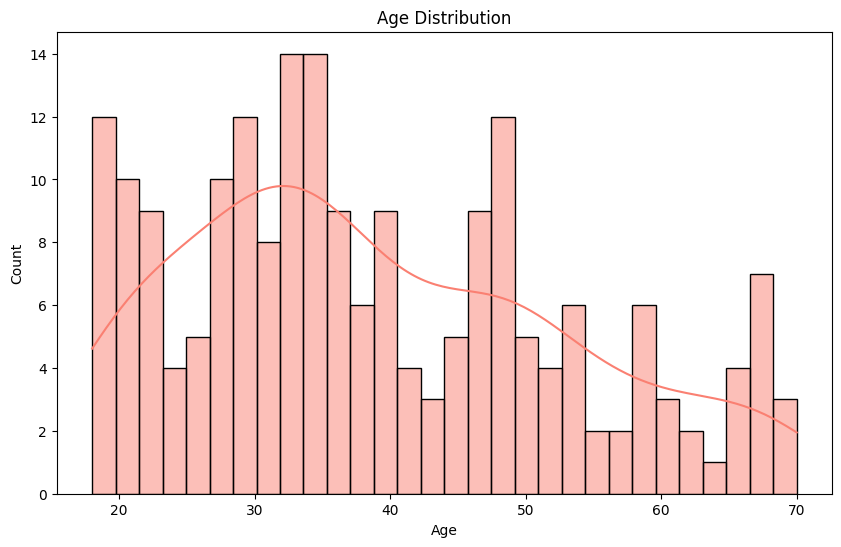

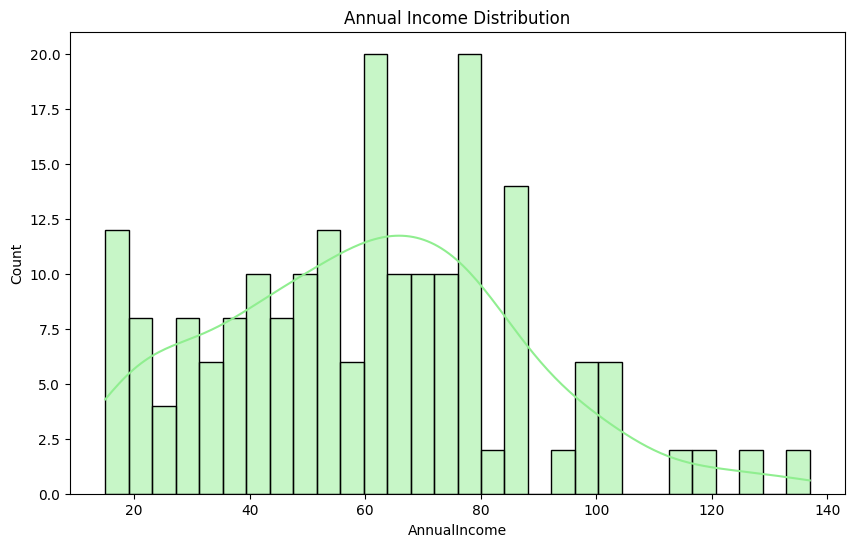

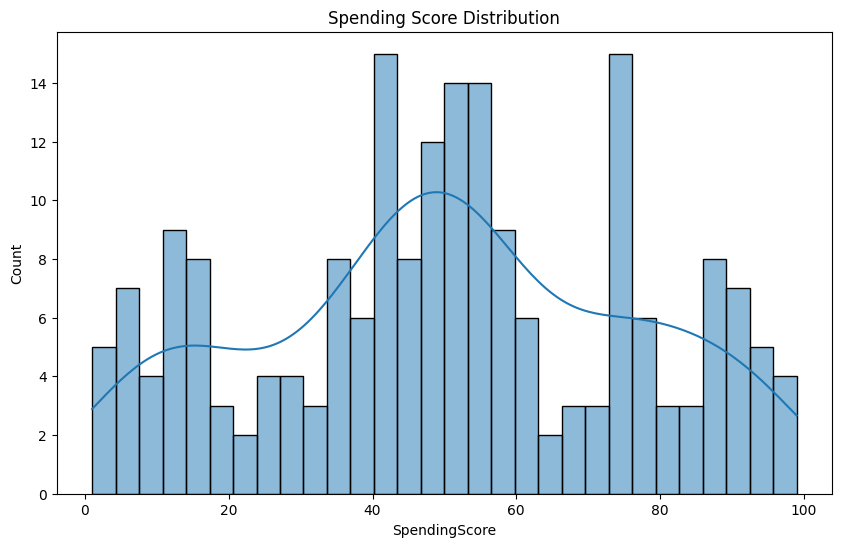

In [49]:
#histplot-Age,Annual income,Spending score
# Visualizing distributions
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='salmon')
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['AnnualIncome'], bins=30, kde=True, color='lightgreen')
plt.title('Annual Income Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['SpendingScore'], bins=30, kde=True)
plt.title('Spending Score Distribution')
plt.show()

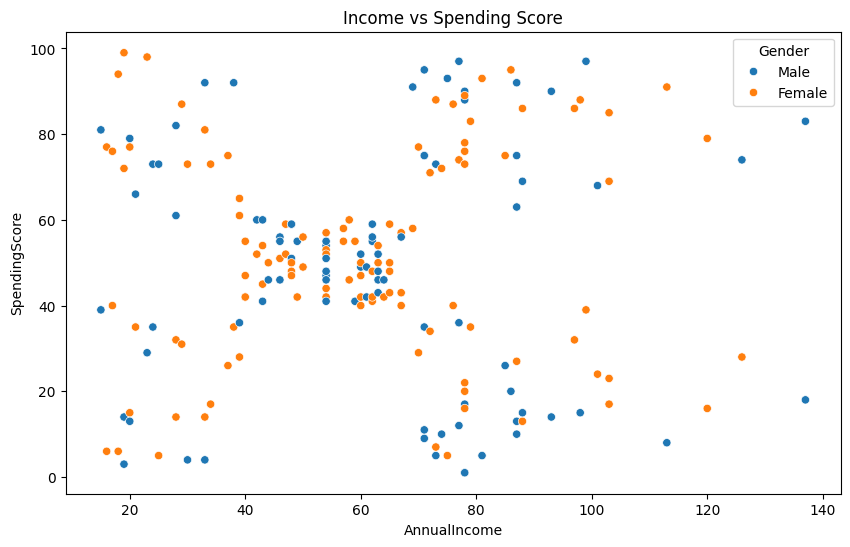

In [50]:
# Visualizing relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AnnualIncome', y='SpendingScore', hue='Gender')
plt.title('Income vs Spending Score')
plt.show()

In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [53]:
# Feature selection
features = df[['Age', 'AnnualIncome', 'SpendingScore']]

In [54]:
# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [56]:
# Applying K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


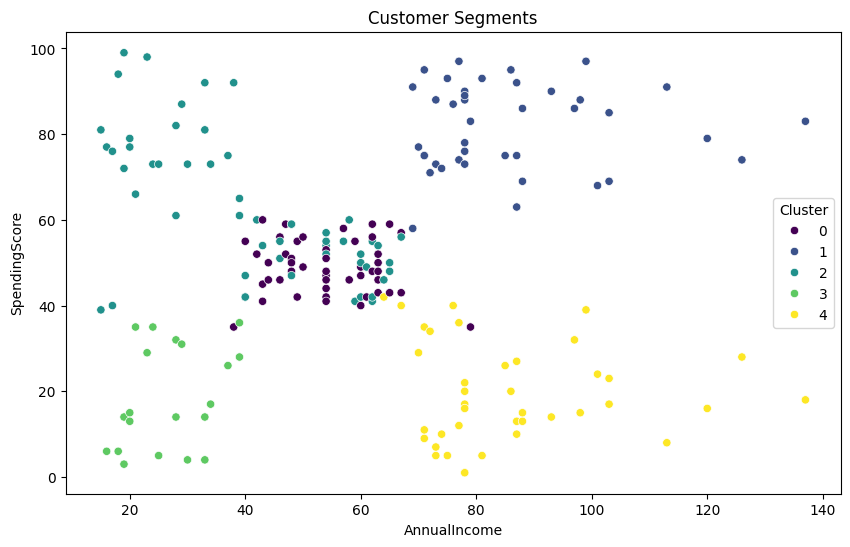

In [57]:
# Evaluating cluster quality
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()

Five Customer Segments Revealed by Spending Habits and Income.
The analysis unveils five distinct customer segments based on their annual income and spending behavior. We can visualize these segments using the following color scheme:-

Cluster 0 (Purple): These customers have low to moderate annual income and a moderate spending score.

Cluster 1 (Blue): These customers have a high annual income and a high spending score.

Cluster 2 (Cyan): These customers have low annual income but a high spending score.

Cluster 3 (Green): These customers have low annual income and a low spending score.

Cluster 4 (Yellow): These customers have high annual income but a low spending score.

**TARGETING STRATEGIES :- **

High Spenders (Clusters 1 & 2): These groups might be targeted for premium products or services.

Low Spend, High Income (Cluster 4): These individuals could be encouraged to spend more through loyalty programs, discounts, or personalized offers.

Conservative Spenders (Cluster 3): Strategies to engage this group might include promotions on necessity items or more affordable luxury goods.